In [1]:
#From Canvas to Database: Leveraging Artist Data to Drive Art Business Strategies

# questions for analysis  
    #Genre Distribution: What genres are most commonly represented among these artists, 
    #and how does this distribution relate to the number of paintings they produced?

    #Nationality and Genre Correlation: Is there a correlation between the artists' nationalities 
    #and the genres they are associated with?

    #Artist Productivity Over Time: How did the productivity 
    #of artists change over the years?   
    #Is there a notable trend in the volume of work produced during their active years?


In [2]:
# Basic data handling and operations
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy.stats import chi2_contingency

# Data
file_path = "artists.csv"
#https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time

#context 
# "After being challenged many times by my girlfriend about who is the best to guess the painter, I decided to use the power of machine learning to defeat her.
#I gathered a collection of artworks of the 50 most influential artists of all time. 
#I added a dataset with basic information retrieved from wikipedia."

df = pd.read_csv(file_path)

display(df.head())
print("------------------")
df.info()
print("------------------")

df.describe()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           50 non-null     int64 
 1   name         50 non-null     object
 2   years        50 non-null     object
 3   genre        50 non-null     object
 4   nationality  50 non-null     object
 5   bio          50 non-null     object
 6   wikipedia    50 non-null     object
 7   paintings    50 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 3.2+ KB
------------------


,id,paintings
count,50.00000,50.000000
mean,24.50000,168.920000
std,14.57738,157.451105
min,0.00000,24.000000
25%,12.25000,81.000000
50%,24.50000,123.000000
75%,36.75000,191.750000
max,49.00000,877.000000


In [3]:
#Preprocessing


# Function to check for null values in the DataFrame
def check_nulls(df):
    print("Checking for null values in the DataFrame:")
    print(df.isnull().sum())

# Function to explode genres into separate rows
def explode_genres(df, column='genre'):
    df[column] = df[column].str.split(',')
    df = df.explode(column)
    return df

# Function to normalize and split years
def process_years(df, column='years'):
    df[column] = df[column].str.replace('–', '-').str.replace('—', '-')
    temp_df = df[column].str.split('-', expand=True)
    df['start_year'] = pd.to_numeric(temp_df[0].str.strip(), errors='coerce')
    df['end_year'] = pd.to_numeric(temp_df[1].str.strip(), errors='coerce')
    return df

# Function to one-hot encode genres and drop original 'years' column
def one_hot_encode_genres(df, column='genre'):
    df = pd.get_dummies(df, columns=[column], prefix="", prefix_sep="")
    return df

# Apply the functions
check_nulls(df)
df = explode_genres(df)
df = process_years(df)
df = one_hot_encode_genres(df)
df = df.drop('years', axis=1)

# Check nulls again and display the DataFrame
check_nulls(df)
display(df)


Checking for null values in the DataFrame:
id             0
name           0
years          0
genre          0
nationality    0
bio            0
wikipedia      0
paintings      0
dtype: int64
Checking for null values in the DataFrame:
id                        0
name                      0
nationality               0
bio                       0
wikipedia                 0
paintings                 0
start_year                0
end_year                  0
Abstract Expressionism    0
Abstractionism            0
Art Nouveau               0
Baroque                   0
Byzantine Art             0
Cubism                    0
Early Renaissance         0
Expressionism             0
High Renaissance          0
Impressionism             0
Mannerism                 0
Muralism                  0
Neoplasticism             0
Northern Renaissance      0
Pop Art                   0
Post-Impressionism        0
Primitivism               0
Proto Renaissance         0
Realism                   0
Romantici

,id,name,nationality,bio,wikipedia,paintings,start_year,end_year,Abstract Expressionism,Abstractionism,...,Pop Art,Post-Impressionism,Primitivism,Proto Renaissance,Realism,Romanticism,Social Realism,Suprematism,Surrealism,Symbolism
0,0,Amedeo Modigliani,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193,1884,1920,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Vasiliy Kandinskiy,Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88,1866,1944,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Vasiliy Kandinskiy,Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88,1866,1944,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Diego Rivera,Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70,1886,1957,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,Diego Rivera,Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70,1886,1957,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,46,Paul Gauguin,French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311,1848,1903,0,0,...,0,0,0,0,0,0,0,0,0,1
46,46,Paul Gauguin,French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311,1848,1903,0,0,...,0,1,0,0,0,0,0,0,0,0
47,47,Raphael,Italian,Raffaello Sanzio da Urbino (Italian: [raffaˈɛl...,https://en.wikipedia.org/wiki/Raphael,109,1483,1520,0,0,...,0,0,0,0,0,0,0,0,0,0
48,48,Michelangelo,Italian,Michelangelo di Lodovico Buonarroti Simoni or ...,https://en.wikipedia.org/wiki/Michelangelo,49,1475,1564,0,0,...,0,0,0,0,0,0,0,0,0,0


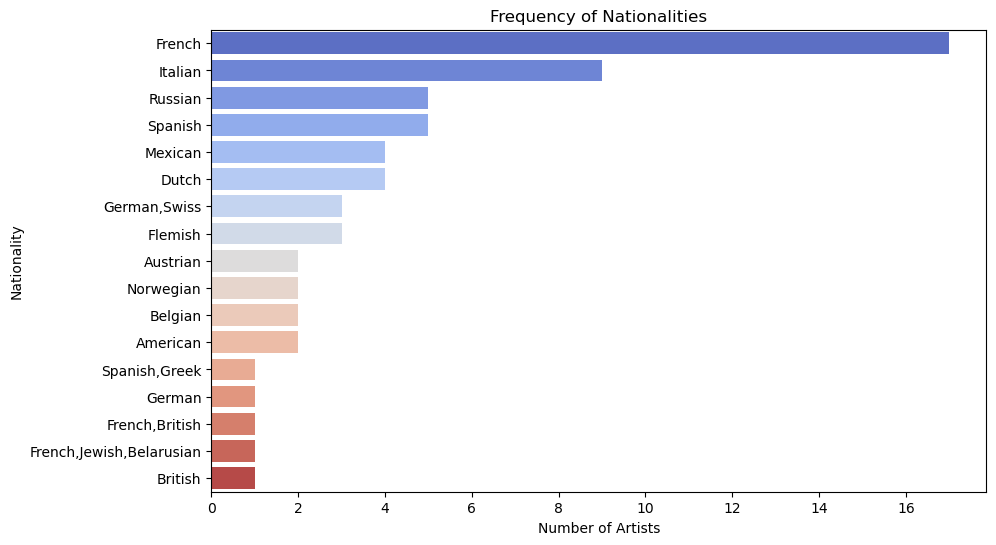

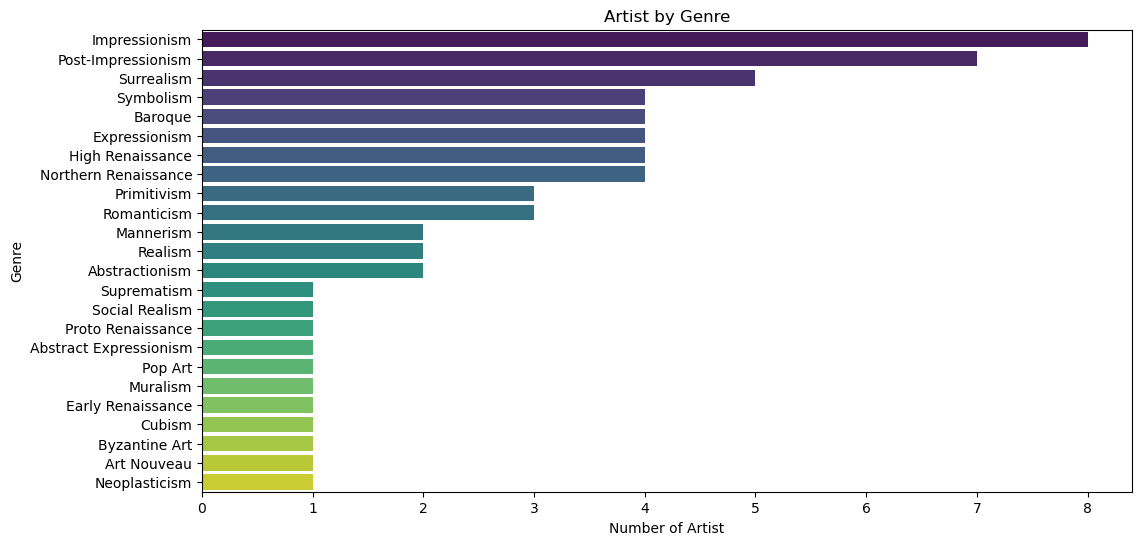

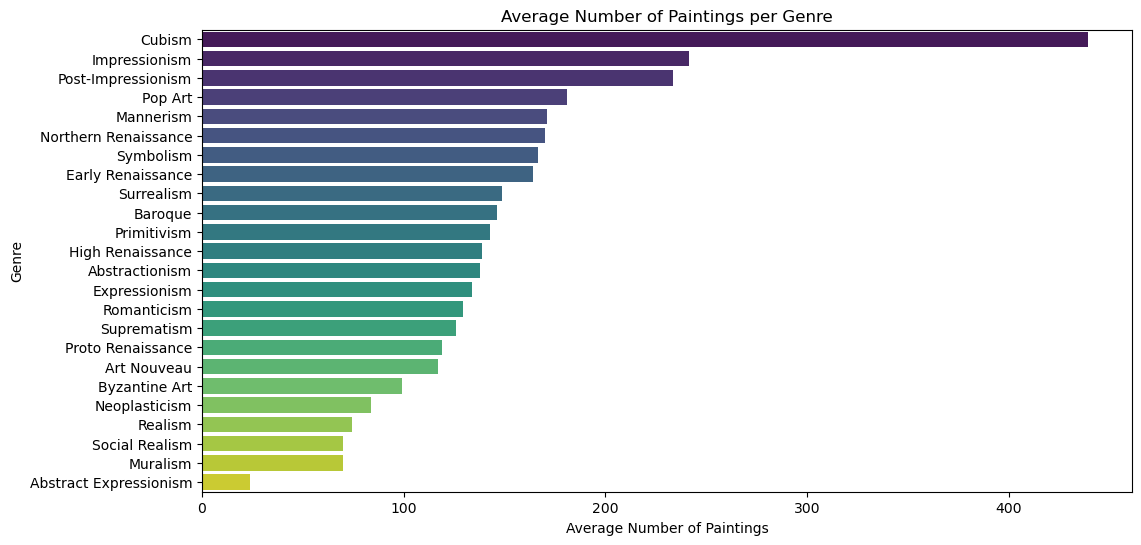

In [10]:

  #Genre Distribution: What genres are most commonly represented among these artists, 
    #and how does this distribution relate to the number of paintings they produced?

def plot_genre_distribution(df):
    """
    Plot the distribution of genres and the average number of paintings per genre.

    Args:
    df (DataFrame): The data frame containing artist and genre data.
    """
    # Calculate total and average paintings per genre
    genre_columns = df.columns[df.columns.get_loc("Abstract Expressionism"):df.columns.get_loc("Symbolism")+1]  
    genre_counts = df[genre_columns].sum().sort_values(ascending=False)
    total_paintings_per_genre = (df[genre_columns] * df['paintings'].values.reshape(-1, 1)).sum()
    average_paintings_per_genre = total_paintings_per_genre / genre_counts
    average_paintings_per_genre_sorted = average_paintings_per_genre.sort_values(ascending=False)

    # Plot total number of paintings by genre
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
    plt.title("Artist by Genre")
    plt.xlabel("Number of Artist")
    plt.ylabel("Genre")
    plt.show()

    # Plot average number of paintings per genre
    plt.figure(figsize=(12, 6))
    sns.barplot(x=average_paintings_per_genre_sorted.values, y=average_paintings_per_genre_sorted.index, palette="viridis")
    plt.title("Average Number of Paintings per Genre")
    plt.xlabel("Average Number of Paintings")
    plt.ylabel("Genre")
    plt.show()

def plot_nationality_distribution(df):
    """
    Plot the distribution of nationalities among the artists.

    Args:
    df (DataFrame): The data frame containing artist nationality data.
    """
    nationality_counts = df['nationality'].value_counts()

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=nationality_counts.values, y=nationality_counts.index, palette="coolwarm")
    plt.title('Frequency of Nationalities')
    plt.xlabel('Number of Artists')
    plt.ylabel('Nationality')
    plt.show()


plot_nationality_distribution(df)

plot_genre_distribution(df)

It is evident from examining the various art forms in our dataset that Impressionism is the most prevalent. Impressionist painters include several of the artists in our database, including Monet. The reason we see so much of this design is probably because it was very popular in the 1800s, moreover showing that our dataset consist of many french artists we must mention the Impressionism  movment which describes a style of painting developed in France during the mid-to-late 19th century, this is why most french artists specialized in such a style and the art space is populated with the style of Impressionism.

However, when it comes to the quantity of paintings produced in each school, Cubism is the most popular due to Picasso. Throughout his life, he produced numerous paintings and was the only artist in our database to have worked in Cubism. For this reason, even if Cubism is limited to him, its numbers are so large.

Impressionism and Post-Impressionism have a significant number of artworks, rivaling or even surpassing Cubism. These styles were immensely popular, and the many notable artists associated with them created a vast amount of work that continues to be celebrated and discussed today.

These observations can help gallery curators and show planners make decisions about which artworks to display. The fact that Impressionism is so widely represented indicates that a sizable audience is aware of and drawn to this genre, which may result in larger attendance. In the meantime, the large number of Cubist pieces—mainly because of Picasso's substantial contributions—indicates that showcasing this movement might provide viewers with a thorough understanding of the development of modern art. Selecting which art trends to highlight can influence an exhibit's theme as well as its likelihood of drawing in both art aficionados and academics.

Chi-square Statistic: 437.8366176470588, p-value: 0.007112548186101429


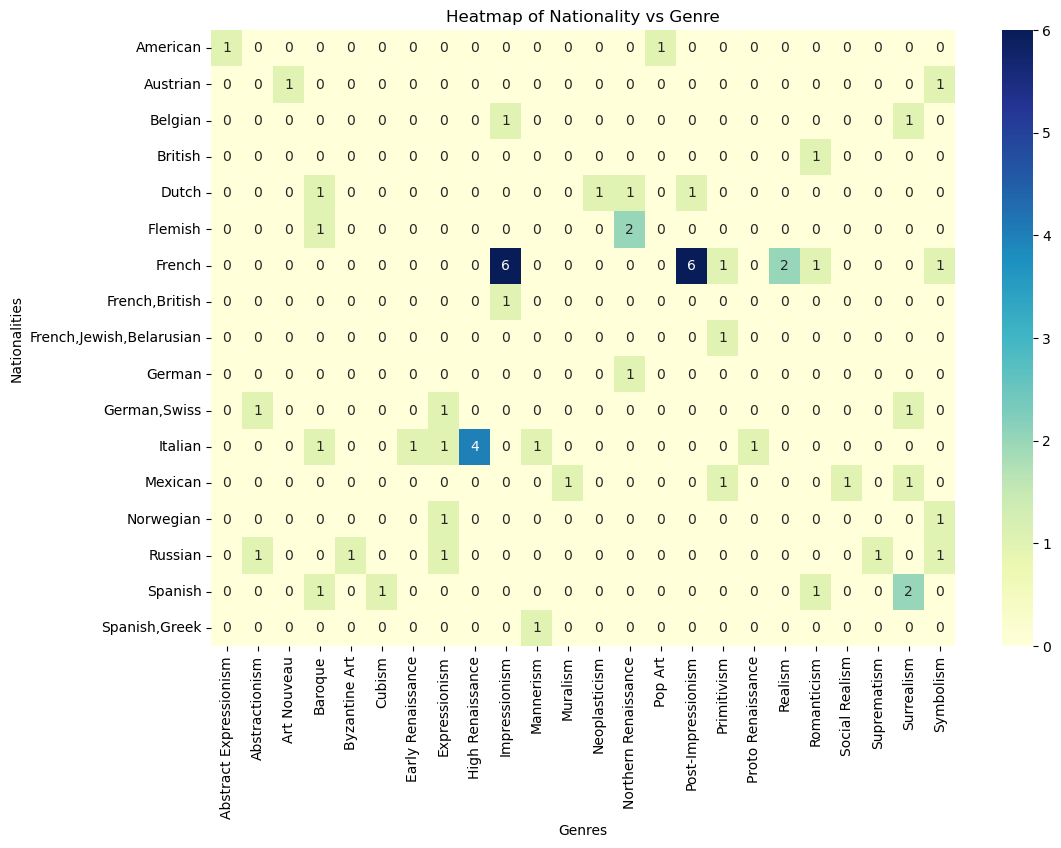

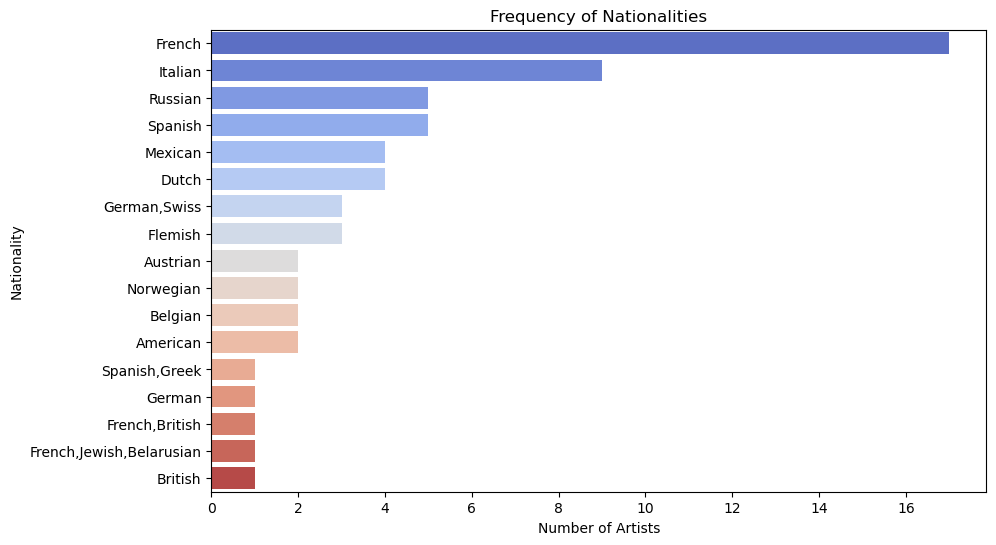

In [9]:
#Nationality and Genre Correlation: Is there a correlation between the artists' nationalities 
#and the genres they are associated with?

def analyze_nationality_genre_correlation(df):
    
    """
    Analyzes the correlation between artists' nationalities and their associated genres.

    Args:
    df (DataFrame): The data frame containing nationality and genre data.
    """
    # Melt the DataFrame to long format for easier analysis
    df_long_format = df.melt(id_vars=['nationality'], value_vars=df.columns[df.columns.get_loc("Abstract Expressionism"):df.columns.get_loc("Symbolism")+1], var_name='genre', value_name='is_genre')
    df_long_format = df_long_format[df_long_format['is_genre'] == 1]

    # Create a contingency table
    contingency_table = pd.crosstab(df_long_format['nationality'], df_long_format['genre'])

    # Perform the chi-square test
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-square Statistic: {chi2_stat}, p-value: {p_val}")

    # Visualize the contingency table as a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
    plt.title('Heatmap of Nationality vs Genre')
    plt.xlabel('Genres')
    plt.ylabel('Nationalities')
    plt.show()

    return chi2_stat, p_val, contingency_table

chi2_stat, p_val, contingency_table = analyze_nationality_genre_correlation(df)


The heatmap gives insights into artists' preferred art styles across different countries. For instance, it's not surprising that French artists are heavily involved in creating Impressionist and Post-Impressionism artworks since these styles originated in France. This suggests that artists are influenced by the popular art movements in their own countries.

Understanding these connections can be helpful for art exhibitions held in specific countries. Exhibitions in other countries can adapt their displays to match the preferences and familiarity of their local audience. For example, if an exhibit is in France, it's likely that people there are already familiar with Impressionism and Post-Impressionism due to their cultural significance.


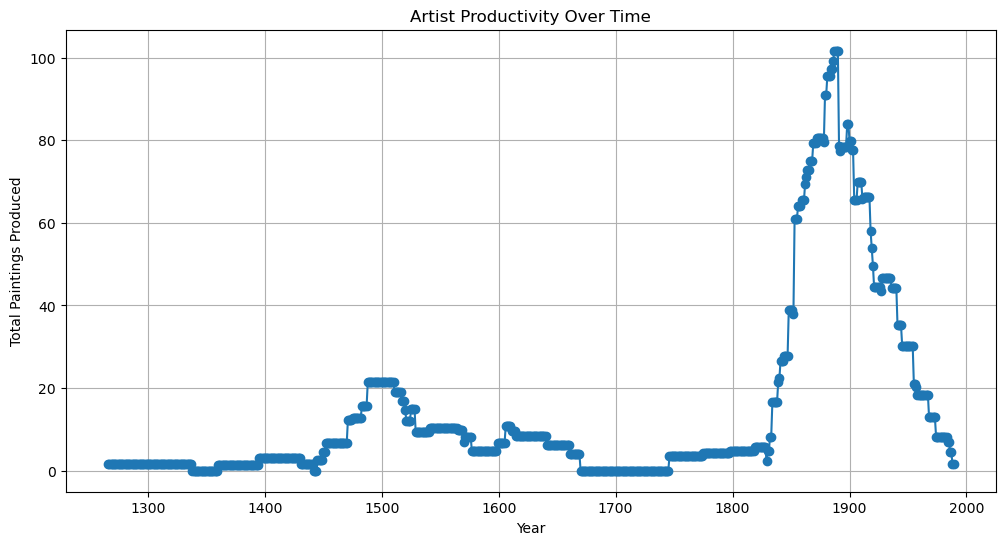

In [6]:
#Artist Productivity Over Time: How did the productivity 
#of artists change over the years?   
#Is there a notable trend in the volume of work produced during their active years?


def calculate_yearly_productivity(df):
    """
    Calculates and plots the productivity of artists over the years based on their active periods.

    Args:
    df (DataFrame): DataFrame containing 'start_year', 'end_year', and 'paintings' columns.

    Returns:
    DataFrame: A DataFrame with the total number of paintings per year.
    """
    # Check required columns
    if not {'start_year', 'end_year', 'paintings'}.issubset(df.columns):
        raise ValueError("Missing necessary columns in DataFrame.")
    
    # Prepare DataFrame to collect yearly data
    years_range = range(int(df['start_year'].min()), int(df['end_year'].max()) + 1)
    yearly_paintings = pd.DataFrame(index=years_range)

    # Calculate paintings per year for each artist
    df['years_active'] = df['end_year'] - df['start_year'] + 1
    for year in years_range:
        yearly_paintings.loc[year, 'Paintings'] = df.apply(
            lambda x: x['paintings'] / x['years_active'] if x['start_year'] <= year <= x['end_year'] else 0,
            axis=1
        ).sum()

    return yearly_paintings

def plot_productivity(yearly_data):
    """
    Plots the yearly productivity data.

    Args:
    yearly_data (DataFrame): DataFrame with index as years and a 'Paintings' column.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_data.index, yearly_data['Paintings'], marker='o', linestyle='-')
    plt.title('Artist Productivity Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Paintings Produced')
    plt.grid(True)
    plt.show()
df['start_year'] = pd.to_numeric(df['start_year'], errors='coerce')
df['end_year'] = pd.to_numeric(df['end_year'], errors='coerce')
yearly_paintings_summary = calculate_yearly_productivity(df)
plot_productivity(yearly_paintings_summary)


When museums are planning an exhibit, they often look for times when art was booming, 
and lots of great pieces were being made. Our graph shows that around the 1900s, 
artists were really busy making lots of paintings. This was when famous artists like Monet were doing Impressionism 
and Picasso was starting Cubism. There were so many new ideas in art, and that's why we have so many paintings from this time.

If a museum wants to have a successful exhibit, picking pieces from 
this busy time could be a smart move. People love these styles, 
and there are enough paintings out there to make a really interesting show. 
This era was a hot spot for creativity, and it can still attract big crowds to museums today.